# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [3]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

In [4]:
# Additional imports
from itertools import permutations
import seaborn as sns
from scipy.stats import chi2_contingency
import functools
import operator
import collections
from matplotlib.patches import Patch
from copy import deepcopy

import warnings
warnings.filterwarnings('ignore')

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [5]:
df_x = pd.read_csv("task_1/lm_scores/lm_X.csv")
df_y = pd.read_csv("task_1/lm_scores/lm_Y.csv")
df_z = pd.read_csv("task_1/lm_scores/lm_Z.csv")
df_test = pd.read_csv("task_1/mmlu_data/test.csv")

df_keys = {
    "x":df_x,
    "y":df_y,
    "z":df_z,
    "test":df_test
}

for key, df in df_keys.items():
    print("Shape of df_{}: {}".format(key,df.shape))

Shape of df_x: (13882, 2)
Shape of df_y: (13978, 2)
Shape of df_z: (13923, 2)
Shape of df_test: (14042, 8)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

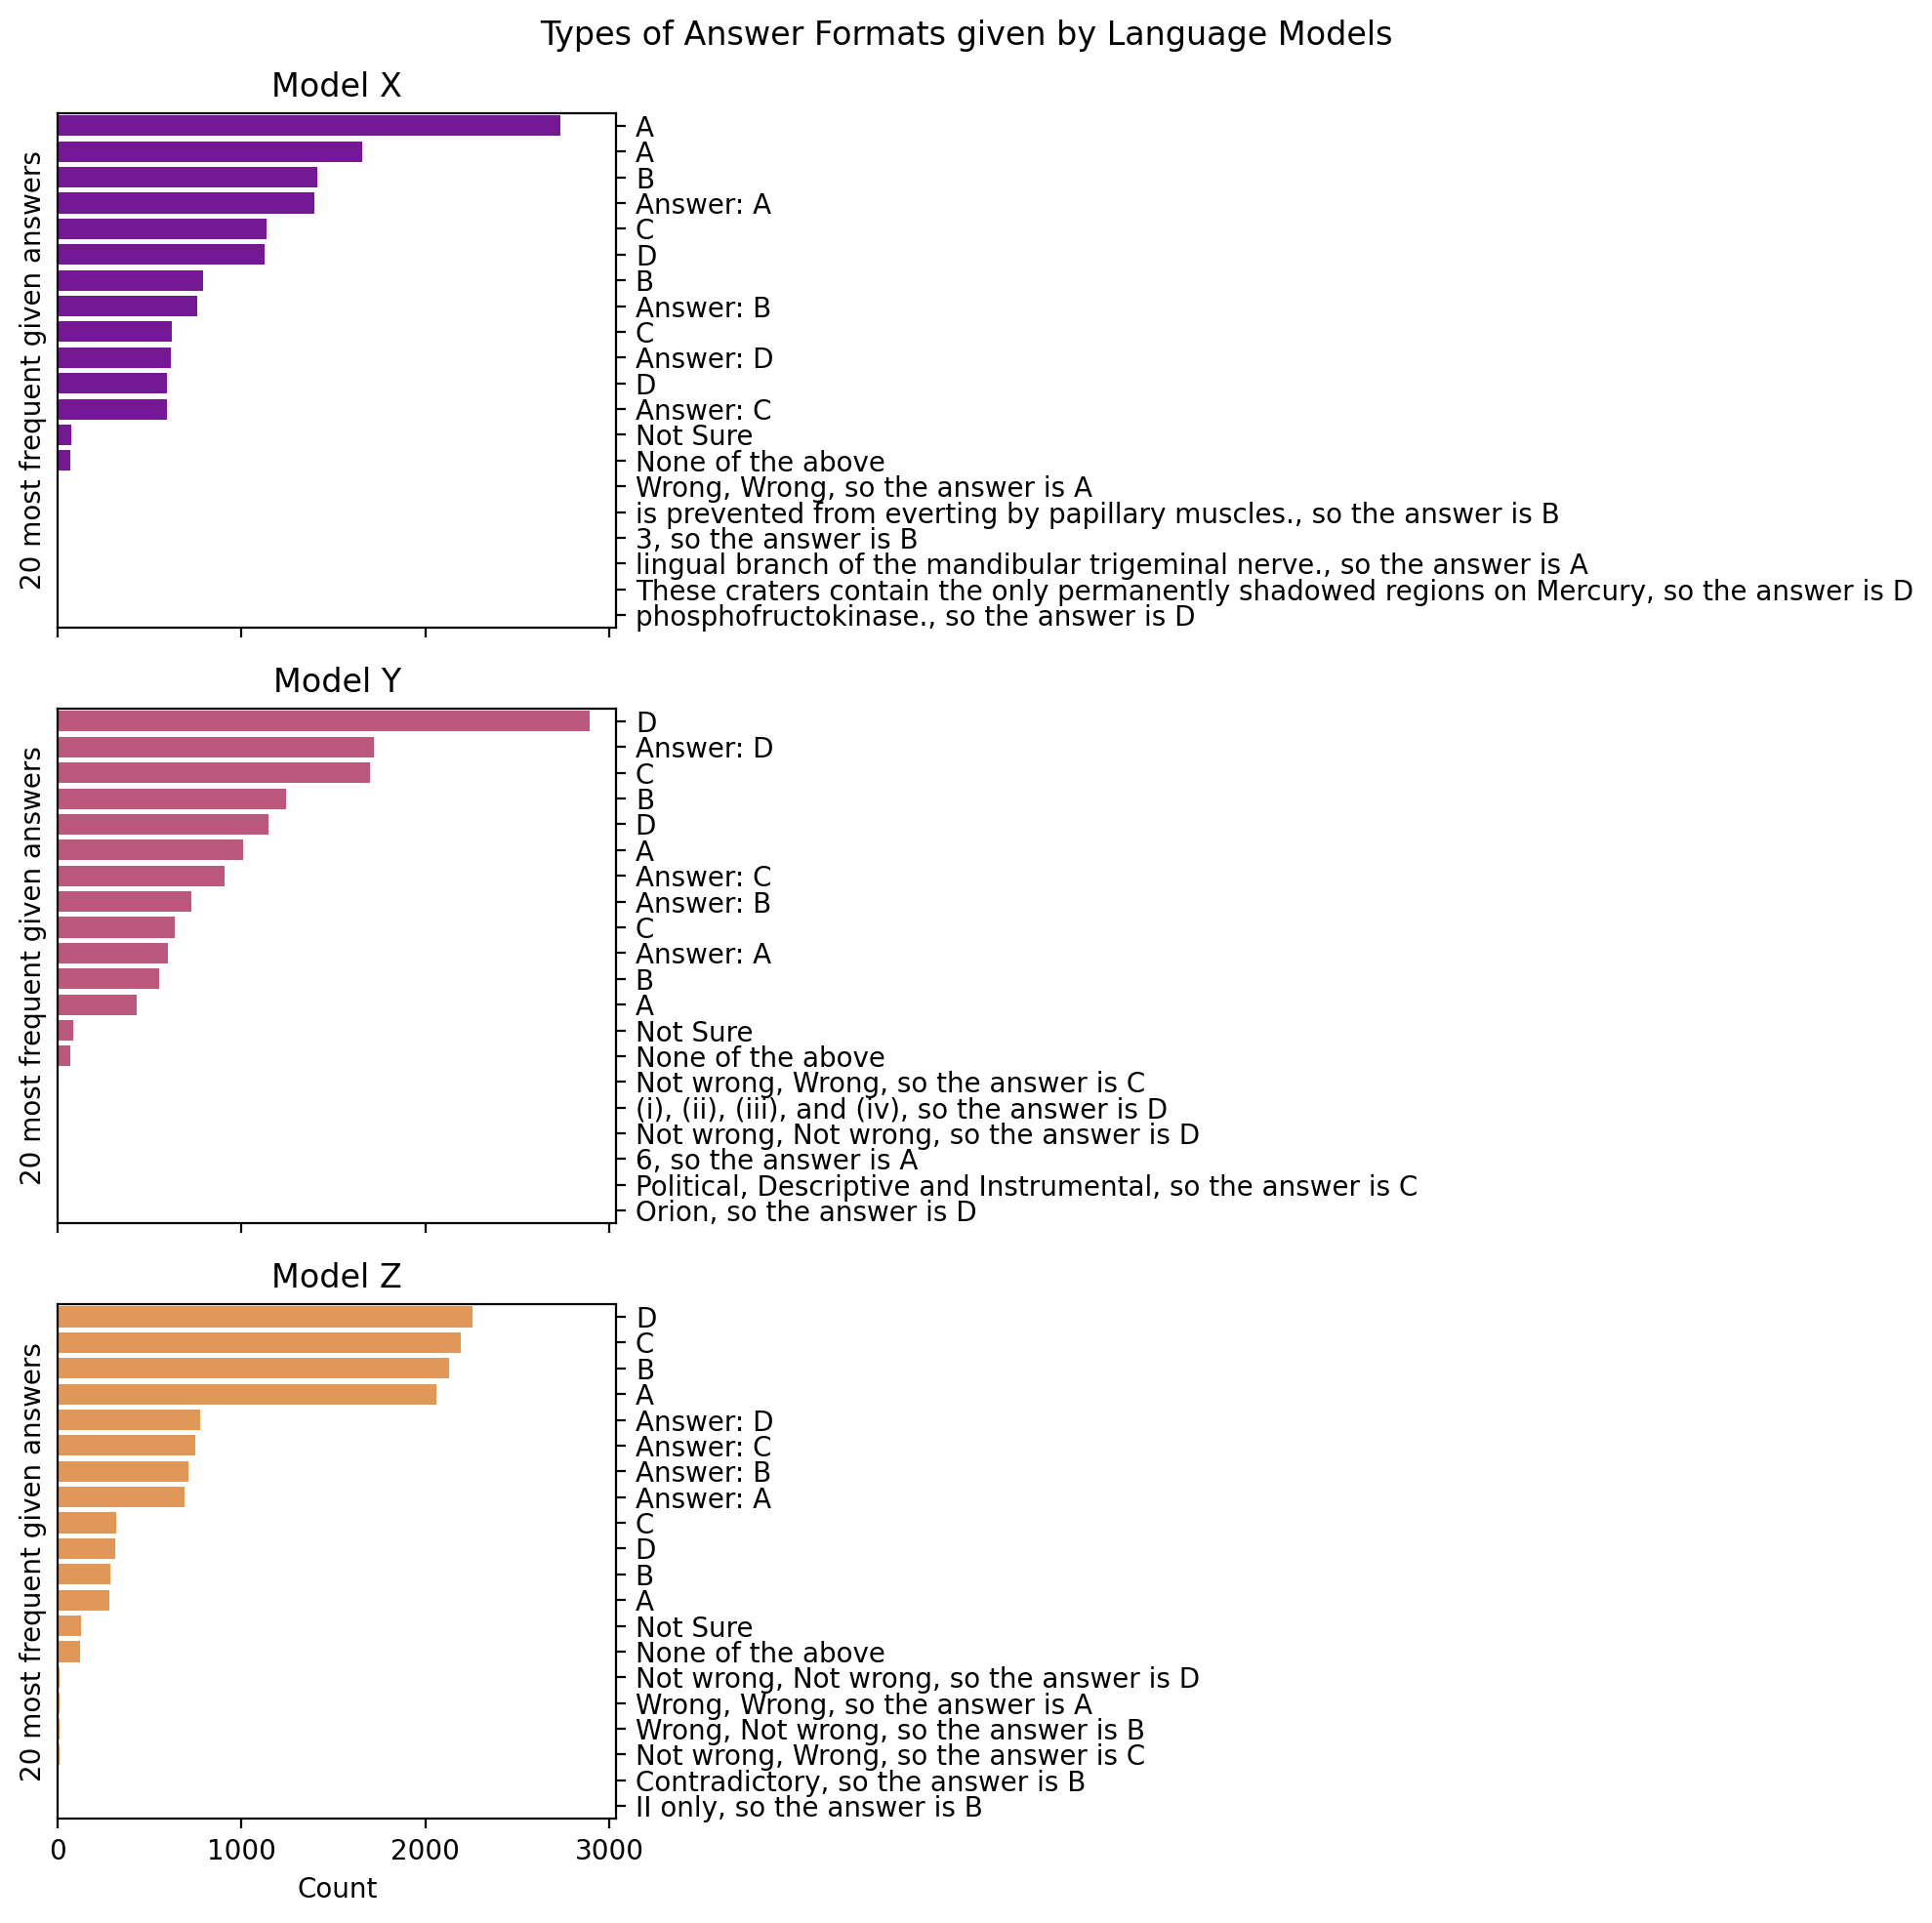

In [6]:
# A
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True, dpi=200)

colors = sns.color_palette("plasma", n_colors=3)

for ax, (key, df), color in zip(axes.flatten(), df_keys.items(), colors):
    if key != "test":
        # print("Type and count of answers in df_{} (first 20 entries):".format(key))
        # display(df["result"].value_counts().reset_index().head(20))
        sns.barplot(
            df["result"].value_counts().reset_index().head(20),
            y="result",
            x="count",
            ax=ax,
            color=color,
        )
        ax.set_ylabel("20 most frequent given answers")
        ax.set_xlabel("Count")
        ax.set_title(f"Model {key.capitalize()}")
        ax.yaxis.tick_right()

fig.suptitle("Types of Answer Formats given by Language Models")
plt.tight_layout()
plt.show()

B.

LMs don't necessarily answer with the unique letter as one would in an MCQ exam. It often adds surrounding text to the output, such as (1) "Answer: ...", (2) additional "reasoning", (3) extra white spaces or (4) even answering "not sure". Thus, we do not only observe "A", "B", "C" or "D" as one would expect, but also a myriad of other types of answers, possibly but not necessarily containing the answer.

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [7]:
# A
filtered_dataframes = {}

for key, df in df_keys.items():
    if key != "test":
        filtered_dataframes[key] = deepcopy(df[df["result"].str.len()<10])

In [8]:
# B (functions)
def clean_single_answer(s:str, pattern:list)->str:
    """clean a str according to a list of patterns to remove

    Args:
        s (str): input str to be cleaned
        pattern (list): list of str to be removed from "s"

    Returns:
        str: the clean str
    """
    s = str(s)
    for p in pattern:
        s = s.replace(p,"")
    return s

def clean_answers(df:pd.DataFrame, pattern:list)->pd.DataFrame:
    """clean answers stored in a dataframe df to obtain either A, B, C or D from text. Note: removes answers of type 'not sure'

    Args:
        df (pd.DataFrame): the dataframe containing the answers as str. Should have a column named 'result' containing the strings to be cleaned.
        pattern (list): list of str to be removed

    Returns:
        pd.DataFrame: a new dataframe with cleaned answers (A, B, C or D only)
    """
    if 'result' not in df.columns:
        raise UserWarning("no column 'result', creating a new column 'result' with clean strings")
    
    df["result"] = df["result"].apply(clean_single_answer, pattern=pattern)
    df = df.drop(df[df["result"] == 'NotSure'].index)
    return df

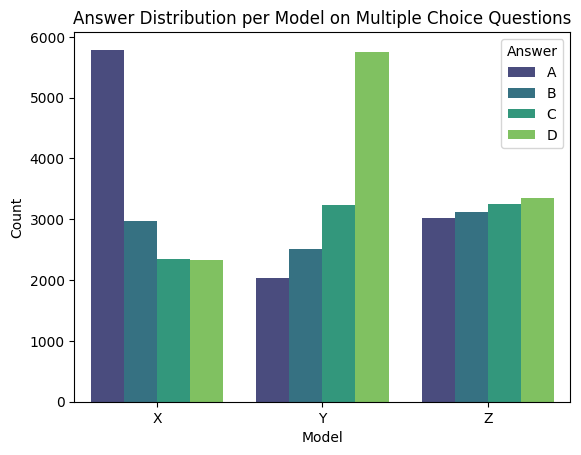

In [9]:
#B (applying to all dataframes)
# for ease of use
clean_df_keys = {
    key: clean_answers(filtered_df,["Answer: ", " "])
    for key, filtered_df in filtered_dataframes.items()
}

counts_per_model_dfs = []
for key, df in clean_df_keys.items():
    sub_df = pd.DataFrame(df["result"].value_counts())
    sub_df["model_name"] = key
    counts_per_model_dfs.append(sub_df)

fig, ax = plt.subplots()
sns.barplot(pd.concat(counts_per_model_dfs), x="model_name", y="count", hue="result", ax=ax, palette="viridis")
ax.set_xticklabels(["X", "Y", "Z"])
ax.set_xlabel("Model")
ax.set_ylabel("Count")
ax.legend(title="Answer")
ax.set_title("Answer Distribution per Model on Multiple Choice Questions")
plt.show()


The above figure shows all answers given by each model, after filtering invalid answers. This shows that the filtering was successful, yielding data with only answers "A", "B", "C", or "D".

Shapes for df_x:
 Before filtering: (13882, 2)
 After filtering: (13436, 2)
 --> Rows removed: 446

Shapes for df_y:
 Before filtering: (13978, 2)
 After filtering: (13551, 2)
 --> Rows removed: 427

Shapes for df_z:
 Before filtering: (13923, 2)
 After filtering: (12753, 2)
 --> Rows removed: 1170



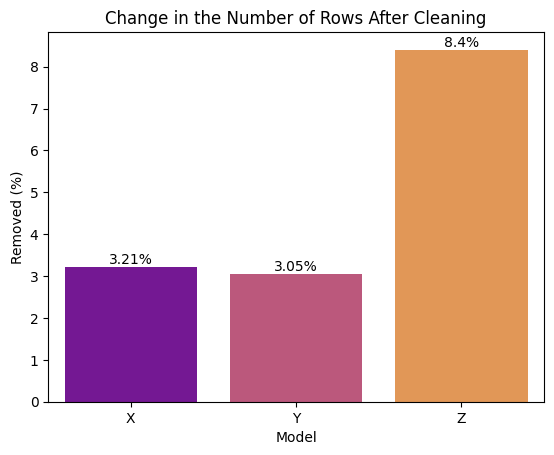

In [10]:
# C (sizes of raw and cleaned dataframes)

for key, df in clean_df_keys.items():
    pre_shape = df_keys[key].shape
    post_shape = df.shape
    print("Shapes for df_{}:\n Before filtering: {}\n After filtering: {}\n --> Rows removed: {}\n".format(key,pre_shape,post_shape,pre_shape[0]-post_shape[0]))

# plots
shape_dict = {
    'key': [],
    'pre_rows': [],  # nbr of rows before cleaning
    'post_rows': []  # nbr of rows after cleaning
}
for key, df in clean_df_keys.items():
    pre_shape = df_keys[key].shape[0]  
    post_shape = df.shape[0]    
    shape_dict['key'].append(key)
    shape_dict['pre_rows'].append(pre_shape)
    shape_dict['post_rows'].append(post_shape)
shape_df = pd.DataFrame(shape_dict)
shape_df['percentage_change'] = ((shape_df['pre_rows'] - shape_df['post_rows']) / shape_df['pre_rows']) * 100
ax = sns.barplot(x='key', y='percentage_change', data=shape_df,palette="plasma")
ax.set_title('Change in the Number of Rows After Cleaning')
ax.set_xlabel('Model')
ax.set_ylabel('Removed (%)')
ax.set_xticklabels(["X", "Y", "Z"])
for _, bar_container in enumerate(ax.containers):
    ax.bar_label(
        bar_container,
        fmt="{:.3}%",
        label_type="edge",
    )
plt.show()


C.

After filtering the answers of each language model, many rows were removed in the dataframes. However, the number of rows removed varies from one model to another. Notably, language model Z shows a higher absolute and relative number of rows removed compared to models X and Y, suggesting that it tends to provide more "invalid" answers than X and Y. As the answers are filtered by length (If length > 10) it seems the model is more verbose (produces longer answers). In addition, all three dataframes have a different number of rows, meaning that the models did not answer the same number of questions. Altogether, this introduces bias when comparing the performance of the three language models, as, for example, one model could have answered more difficult questions or questions related to different subjects than another. This needs to be kept in mind for the rest of the analysis.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [11]:
# A
results_df_keys = {
    key: df_test.join(clean_df.set_index("question_id"), how='inner',on="question_id",lsuffix=f"_{key}").dropna()
    for key, clean_df in clean_df_keys.items()
}

In [12]:
# B (function)
def calculate_avg_scores(results_df_keys:dict)->dict:
    """adds a new column "correct" to results_df_keys that checks if the model's answer in the "results" column is the same as in the "answer" column, then calculates the average score of each model x, y, z.

    Args:
        results_df_keys (dict): a dictionary that should contain for each LM (x,y and z) a column "answer" with the expected answer and a column "result" with the answer of the LM.

    Returns:
        dict: a new dictionary with the average score for each df_x, df_y, df_z.
    """
    avg_scores = {}
    for key, df in results_df_keys.items():
        # adding "correct" column
        df["correct"] = df["answer"] == df["result"]
        # avg scores
        n_true = df["correct"].value_counts().get(True, 0)
        n_false = df["correct"].value_counts().get(False, 0)
        total = n_true + n_false
        if total > 0:
            avg_scores[key] = n_true / total
        else:
            avg_scores[key] = 0
    return avg_scores

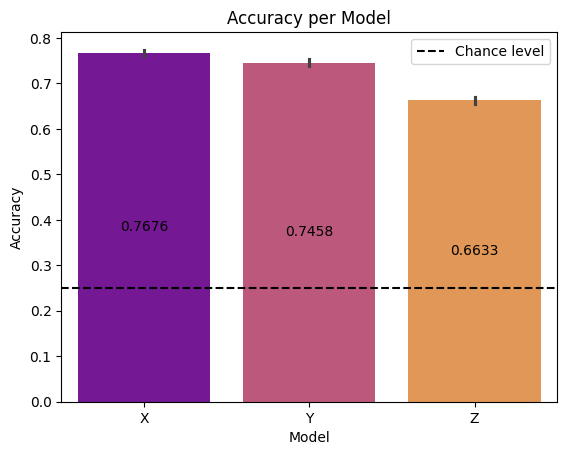

In [13]:
# B
avg_scores = calculate_avg_scores(results_df_keys)

for key, df in results_df_keys.items():
    df["model_name"] = key

ax = sns.barplot(
    pd.concat(
        results_df_keys.values()
    ),
    x="model_name",
    y="correct",
    palette="plasma",
    hue="model_name",
    legend=False
)

for _, bar_container in enumerate(ax.containers):
    ax.bar_label(
        bar_container,
        fmt="{:.4}",
        label_type="center",
    )

ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy per Model")
ax.set_xticklabels(["X", "Y", "Z"])
ax.axhline(0.25, label="Chance level", linestyle="--", color="black")
ax.legend()
plt.show()

From these results, we observe that all three models perform relatively well, way above chance level. Model X performs the best (76.76%) while model Z performing the worst (66.33%). It is worthy to note however that model X and Y's (74.58%) performances don't seem significantly different. Therefore, other metrics will be necessary to determine a superior model. Such metrics are proposed in the remainder of this analysis.

### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [14]:
# A - functions
def calculate_difference(model_1:str, model_2:str, df:pd.DataFrame)->None:
    df[f"|{model_1}-{model_2}|/{model_2}"]=np.abs((df[model_1]-df[model_2]))/df[model_2]

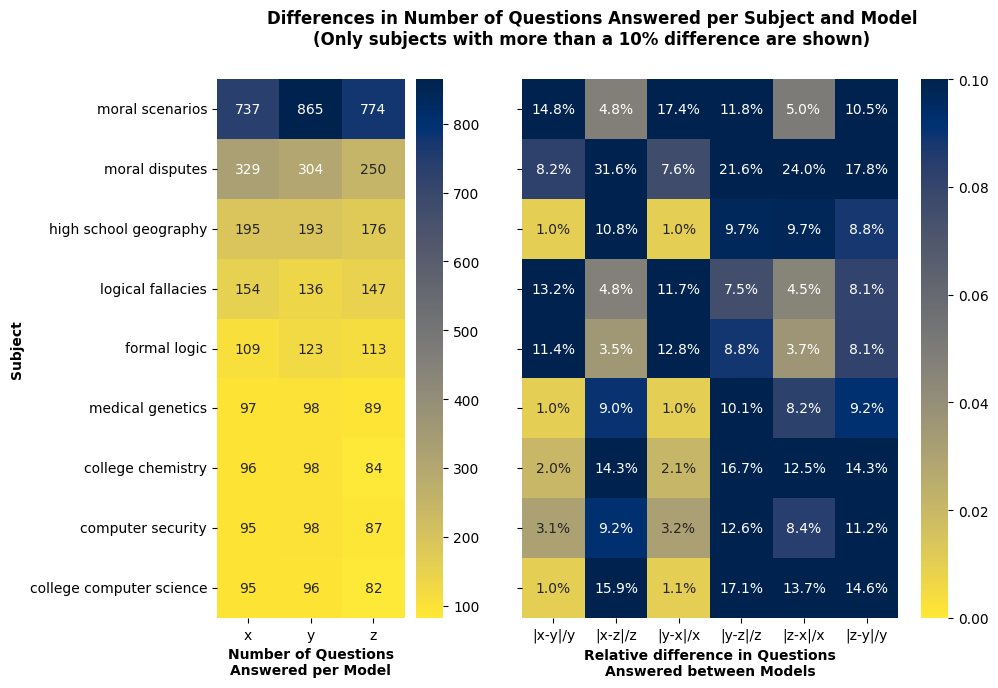

In [15]:
# A
subject_count_df = pd.concat([res_df["subject"].value_counts().to_frame().rename(columns={"count":key}) for key, res_df in results_df_keys.items()], axis=1)
    
for model_1, model_2 in permutations(results_df_keys.keys(), 2):
    calculate_difference(model_1, model_2, subject_count_df)

subset_df = subject_count_df.loc[((subject_count_df > 0.1) * (subject_count_df < 1)).replace(False, np.nan).dropna(how="all").index]
# display(subset_df)

fig, axes = plt.subplots(nrows=1,ncols=2, sharey=True, width_ratios=[0.3,0.6], figsize=(10,7))
axes[0] = sns.heatmap(subset_df[["x","y","z"]],
                      annot=True,
                      fmt=".0f",
                      ax = axes[0],
                      cmap="cividis_r")
axes[0].set_ylabel("Subject", weight="bold")
axes[0].set_xlabel("Number of Questions\nAnswered per Model", weight="bold")

clim = 0.1
axes[1] = sns.heatmap(subset_df[["|x-y|/y","|x-z|/z","|y-x|/x","|y-z|/z","|z-x|/x","|z-y|/y"]],
            annot=True,
            ax=axes[1],
            cmap="cividis_r",
            vmax=clim,
            fmt=".1%")
axes[1].collections[0].set_clim(0,clim) 
axes[1].set_ylabel("")
axes[1].set_xlabel("Relative difference in Questions\nAnswered between Models", weight="bold")

fig.suptitle("Differences in Number of Questions Answered per Subject and Model\n(Only subjects with more than a 10% difference are shown)", weight="bold")

plt.show()

The figure above shows how each model answers different numbers of questions across different subjects. In particular, the panel on the right shows that differences between model X and model Y are generally smaller than differences with model Z. 
It is interesting to note that although models X and Y display only minor differences, certain specific subjects, such as questions related to logic and morality, seem to distinguish them. Concerning logic related questions, model Z seems to be closer to model X than to Y. 

The count of questions answered per subject is shown in the panel on the left, and, for a more comprehensive review, in the figure below.

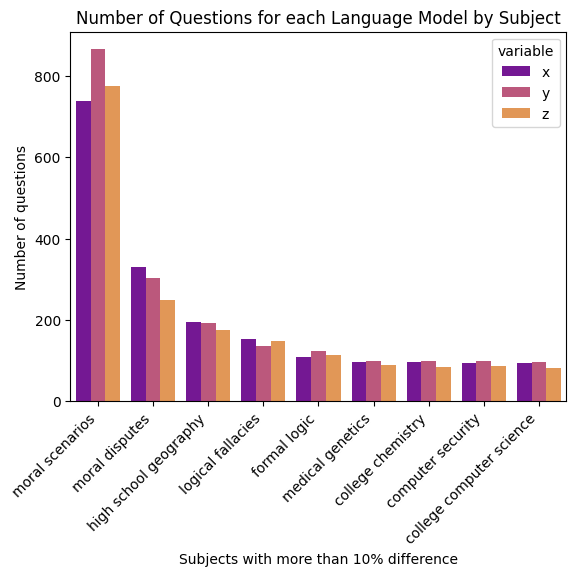

In [16]:
# A
subset_df=pd.DataFrame({'x':subset_df['x'],'y':subset_df['y'], 'z':subset_df['z']},index=subset_df.index)         
subset_df['subject'] = subset_df.index
melted_df = subset_df.melt(id_vars='subject', var_name='variable', value_name='value')
plt.xticks(rotation=45, ha="right")
plt.title("Number of Questions for each Language Model by Subject")
plt.xlabel("Subjects with more than 10% difference")
plt.ylabel("Number of questions")
sns.barplot(x='subject', y='value', hue='variable', data=melted_df, palette="plasma")
plt.show()

As discussed above, this figure shows the distribution of the number of questions answered by each model, for which there is a difference larger than 10% between one or more models. In addition to the above analysis, we observe that the difference with model Z generally arises from the fact that it answers to fewer questions in each subject. 
This is expected, as 8.4% of Z's answers were previously filtered, significantly more than the other models. 
Finally, the case of "moral scenarios" shown in both figures above is a relevant example of how biases may arise when comparing models.

To rebalance the dataset and minimize bias, we propose to find, per subject, the model which answered the least amount of questions, and sample without replacement this number of data points in the other two models. This down-sampling is implemented below.

In [17]:
# B
min_subject_counts = subject_count_df[["x", "y", "z"]].T.describe().loc["min"]
balanced_results_df_keys = {
    key:pd.concat([subject_df.sample(n=int(min_subject_counts[subject]), replace=False, random_state=13) for (subject, subject_df) in result_df.groupby("subject")], axis=0)
    for key, result_df in results_df_keys.items()
}
for key, balanced_df in balanced_results_df_keys.items():
    print(f"Number of rows in the downsampled dataframe {key}: {balanced_df.shape[0]}")

Number of rows in the downsampled dataframe x: 12687
Number of rows in the downsampled dataframe y: 12687
Number of rows in the downsampled dataframe z: 12687


Expectedly, we observe that all dataframes now have the same number of rows. In addition, we show the distribution of the number of questions answered per subject after downsampling, identical for all three models.

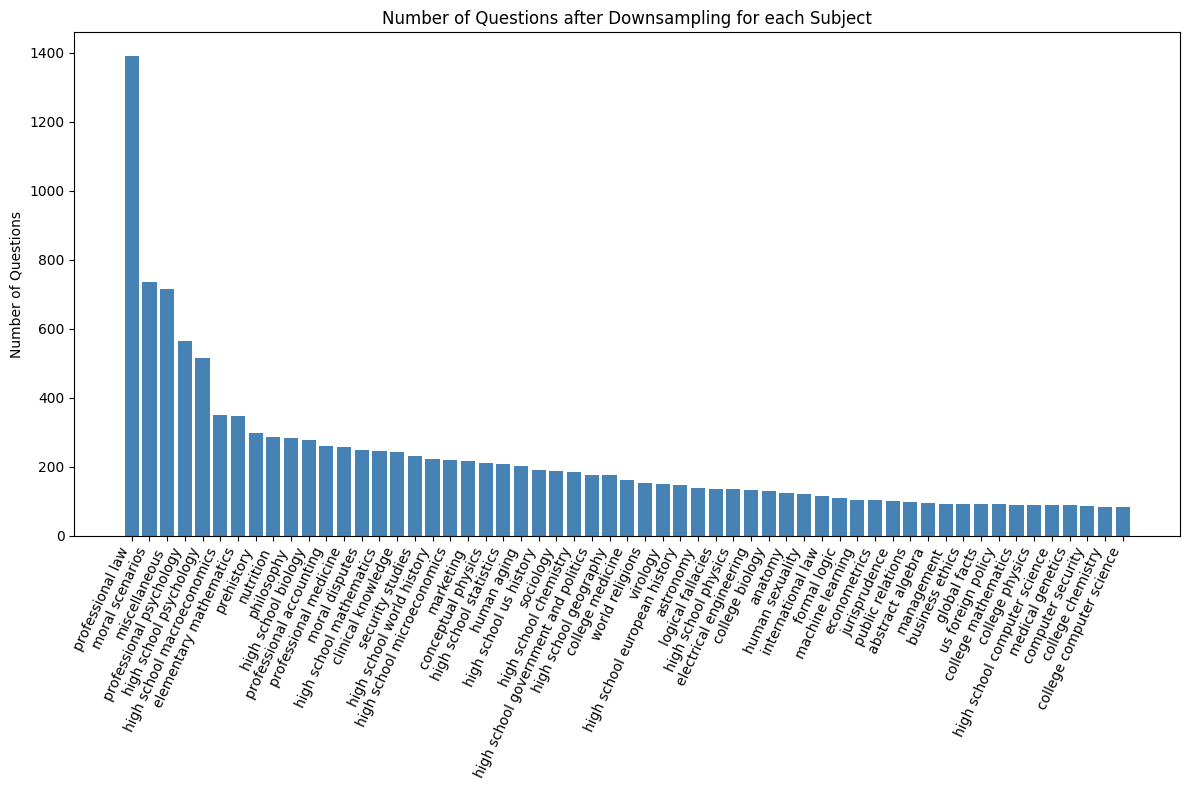

In [18]:
balanced_subject_count_df = pd.concat([res_df["subject"].value_counts().to_frame().rename(columns={"count":key}) for key, res_df in balanced_results_df_keys.items()], axis=1)
plt.figure(figsize=(12, 8))
plt.bar(balanced_subject_count_df.index, balanced_subject_count_df['x'], color='steelblue')
plt.ylabel('Number of Questions')
plt.title('Number of Questions after Downsampling for each Subject')
plt.xticks(rotation=65,ha="right")
plt.tight_layout()
plt.show()

As an additional diagnostic, we show below the effect of downsampling on each model.

In [19]:
for key, result_df in results_df_keys.items():
    pre_shape = result_df.shape
    post_shape = balanced_results_df_keys[key].shape
    print("Shapes for df_{}:\n Before downsampling: {}\n After downsampling: {}\n --> Rows removed: {}\n".format(key,pre_shape,post_shape,pre_shape[0]-post_shape[0]))

Shapes for df_x:
 Before downsampling: (13427, 11)
 After downsampling: (12687, 11)
 --> Rows removed: 740

Shapes for df_y:
 Before downsampling: (13541, 11)
 After downsampling: (12687, 11)
 --> Rows removed: 854

Shapes for df_z:
 Before downsampling: (12743, 11)
 After downsampling: (12687, 11)
 --> Rows removed: 56



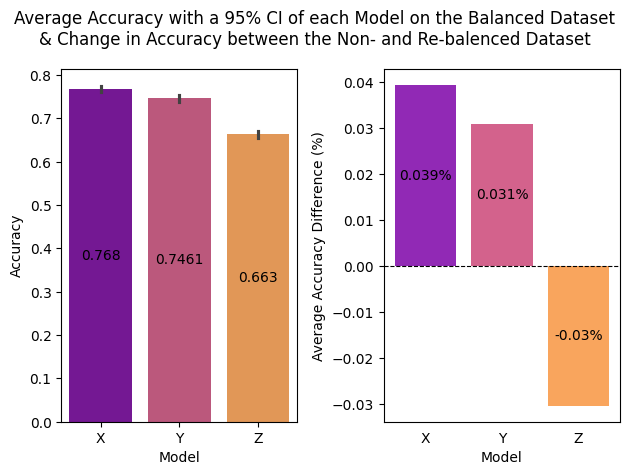

In [20]:
# C
avg_scores_balanced = calculate_avg_scores(balanced_results_df_keys)
score_difference = {
    "x":0.0,
    "y":0.0,
    "z":0.0
}
for key, df in balanced_results_df_keys.items():
    score_difference[key] = (avg_scores_balanced[key]-avg_scores[key])*100 # Multiply by 100 to obtain a percentage

colors = sns.color_palette("plasma",3)
fig, (ax_, ax) = plt.subplots(nrows=1,ncols=2)
ax.bar(score_difference.keys(), score_difference.values(), color=colors, alpha=0.85)
ax.set_ylabel('Average Accuracy Difference (%)')
ax.set_xlabel('Model')
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax.tick_params(bottom = False) 
for _, bar_container in enumerate(ax.containers):
    ax.bar_label(
        bar_container,
        fmt="{:.2}%",
        label_type="center",
    )
    
sns.barplot(
    pd.concat(balanced_results_df_keys.values()),
    x="model_name",
    y="correct",
    ax=ax_,
    hue="model_name",
    palette="plasma",
)
for _, bar_container in enumerate(ax_.containers):
    ax_.bar_label(
        bar_container,
        fmt="{:.4}",
        label_type="center",
    )
ax_.set_ylabel("Accuracy")
ax_.set_xlabel("Model")
ax_.set_xticklabels(["X", "Y", "Z"])
ax.set_xticklabels(["X", "Y", "Z"])

fig.suptitle("Average Accuracy with a 95% CI of each Model on the Balanced Dataset\n& Change in Accuracy between the Non- and Re-balenced Dataset")


plt.tight_layout()
plt.show()

Although the data set is now balanced, there is not a great change in the average accuracy of each model. The small differences see models X and Y increase in accuracy, while Z decreases in accuracy.

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [21]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [22]:
# A (Functions)
def compute_stats(df:pd.DataFrame)->pd.DataFrame:
    """Compute the mean accuracy and standard errors of each model on both datasets

    Args:
        df (pd.DataFrame): Results over a specific dataset

    Returns:
        pd.DataFrame: Stats dataframe
    """
   
    df['correct_numeric'] = df['correct'].astype(int)
    results = []
    grouped = df.groupby('model_name')
    
    for model_name, group in grouped:
        mean_accuracy = group['correct_numeric'].mean()
        standard_error = np.std(group['correct_numeric'], ddof=1) / np.sqrt(len(group))
        results.append({
            'model_name': model_name,
            'mean_accuracy': mean_accuracy,
            'standard_error': standard_error
        })
    stats = pd.DataFrame(results)
    
    return stats

In [23]:
# A
stats_df_mmlu = compute_stats(df_mmlu)
stats_df_mmlu["dataset"] = "mmlu"
stats_df_other = compute_stats(df_other)
stats_df_other["dataset"] = "other"
stats_df_both_dataset = pd.concat([stats_df_mmlu, stats_df_other], axis=0)
stats_df_both_dataset

,model_name,mean_accuracy,standard_error,dataset
0,X,0.743588,0.004038,mmlu
1,Y,0.761542,0.003941,mmlu
2,Z,0.655951,0.004393,mmlu
0,X,0.787976,0.006668,other
1,Y,0.720936,0.007317,other
2,Z,0.671721,0.007660,other


The above scores and standard errors are plotted in bar plots below.

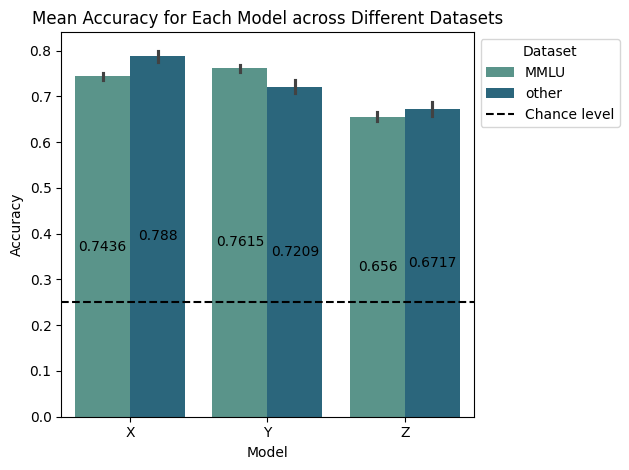

In [24]:
# B
df_mmlu["dataset"] = "MMLU"
df_other["dataset"] = "other"
df_dataset = pd.concat([df_mmlu, df_other], axis=0)
import seaborn as sns

fig, ax = plt.subplots()

sns.barplot(pd.concat([df_mmlu, df_other], axis=0), x="model_name", y="correct", hue="dataset", estimator="mean", errorbar=("ci", 95), palette="crest")
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_title("Mean Accuracy for Each Model across Different Datasets")

for _, bar_container in enumerate(ax.containers):
    ax.bar_label(
        bar_container,
        fmt="{:.4}",
        label_type="center",
    )
    
ax.axhline(0.25, label="Chance level", linestyle="--", color="black")

ax.legend(title="Dataset")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

C.

(i) From the above figure, and as discussed in task 1, all models perform relatively well and largely above chance level, on both datasets. In addition, there is only little difference in mean accuracy within models, between datasets, which shows a certain level of consistency. 

Overall, on a surface level, model Z underperforms compared to the other two, but seems to be more consistent. Choosing between X and Y is difficult since X performs better on the "other" datasets while Y performs best on MMLU. Therefore, we will need to analyze on a deeper level to choose the best model.

(ii) We should expect that the ideal model should perform well across all datasets, but we can see close to a 4% difference across datasets of variation for model X and Y. Although the difference is small, as discussed above, this could imply that the two datasets have different types of questions to which models answer differently.

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

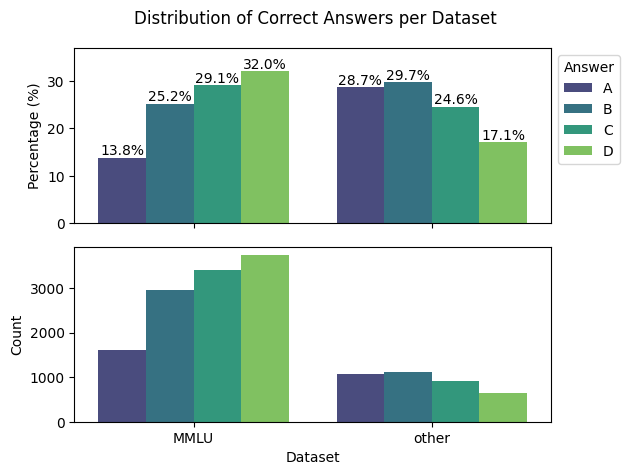

In [25]:
# A
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')
df_mmlu["dataset"] = "MMLU"
df_other["dataset"] = "other"

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

x, y = 'dataset', 'answer'
df = pd.concat([df_mmlu.drop_duplicates("question_id"), df_other.drop_duplicates("question_id")])
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
sns.barplot(
    data=df1,
    x="dataset",
    y="percent",
    hue="answer",
    palette="viridis",
    # stat="percent",
    hue_order=["A", "B", "C", "D"],
    ax=ax1
)
ax1.set_xlabel("Dataset")
ax1.set_ylabel("Percentage (%)")
ax1.legend(title="Answer")
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))


sns.countplot(
    data=df,
    x="dataset",
    hue="answer",
    palette="viridis",
    hue_order=["A", "B", "C", "D"],
    ax=ax2
)
ax2.set_xlabel("Dataset")
ax2.set_ylabel("Count")
ax2.get_legend().remove()



for _, bar_container in enumerate(ax1.containers):
    ax1.bar_label(
        bar_container,
        fmt="{:.3}%",
        label_type="edge",
    )
ax1.set_ylim(0, 1.1*ax1.get_ylim()[-1])

fig.suptitle("Distribution of Correct Answers per Dataset")

plt.tight_layout()
plt.show()

The above figure firstly shows that the MMLU dataset contains more questions than the group of "other" datasets (bottom panel).
Secondly, the figure shows the difference in distribution between the two datasets. Notably, MMLU shows a clearly skewed distribution of answers, towards answer D, while the other resembles a more uniform distribution, perhaps slightly skewed toward answer B.

Below, we show that the distributions are statistically different. We perform a Chi2-contingency test, with the null hypothesis being that the observed data are drawn from identical distributions, and the alternative hypothesis being that the data are drawn from different distributions.

In [26]:
# B

# absolute
distributions = df[["answer","dataset"]]\
.groupby(by="dataset")\
.value_counts()\
.to_frame()\
.pivot_table(values="count",index="answer",columns="dataset")

# percent
distributions = df1.pivot_table(values="percent",index="answer",columns="dataset")

In [27]:
chi2, p, dof, expected = chi2_contingency(distributions)

#formatting print
print(f"Chi-2 Test Results:\n\nChi-Squared Statistic \t{chi2}")
print(f"P-value \t\t{p}")
print(f"Degrees of Freedom \t{dof}")
print(f"Expected Frequencies Table \n{pd.DataFrame(expected)}")

alpha = 0.05 # significance level given 
print(f"\nFrom the P-value, given a significance level of {alpha}:")
if p < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-2 Test Results:

Chi-Squared Statistic 	10.524139682999266
P-value 		0.014598034719655624
Degrees of Freedom 	3
Expected Frequencies Table 
           0          1
0  21.225890  21.225890
1  27.425598  27.425598
2  26.838211  26.838211
3  24.510301  24.510301

From the P-value, given a significance level of 0.05:
Reject the null hypothesis.


At a significance level of 5%, we reject the null hypothesis stated above. This implies that the distribution of correct answers in both dataset are statistically different. 
For this reason, we must keep in mind that there is a bias when using a dataset or the other to compare the models.

In addition, other differences may occur between the datasets, for example in the type or the difficulties of questions asked.

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [28]:
# A (Functions)
def plot_annotation(ax, x:np.ndarray, y:np.ndarray, text:str|None=None, color:str="k")->None:
    """Plot an annotation bar with optional text

    Args:
        ax (matplotlib ax): _description_
        x (np.ndarray): x coordiantes
        y (np.ndarray): y coordinates
        text (str | None, optional): text to put ontop of the bar. Defaults to None.
        color (str, optional): color of the text and the annotated line. Defaults to "k".
    """
    ax.plot(x, y, lw=1, color=color)
    if text is not None:
        ax.text(
            x.mean(), 
            y.max(), 
            text,
            ha='center', 
            va='bottom', 
            color=color,
        )


def calaculate_ttest(df:pd.DataFrame, hue_variable_name:str, x_variable_name:str, y_variable_name:str, population1:list[tuple[str, str]], population2:list[tuple[str, str]])->float:
    """Calaculate a t-test in between two populations inside a dataframe

    Args:
        df (pd.DataFrame): dataframe containing at least the two populations
        hue_variable_name (str): hue used for plotting
        x_variable_name (str): x used for plotting
        y_variable_name (str): y used for plotting
        population1 (list[tuple[str, str]]): a list of tuples containing (x, hue)
        population2 (list[tuple[str, str]]): a list of tuples containing (x, hue)

    Returns:
        float: the pvalue of the t-test
    """
    
    query_1 = " or ".join([f"({hue_variable_name} == '{hue}' and {x_variable_name} == '{x}')" for x, hue in population1])
    query_2 = " or ".join([f"({hue_variable_name} == '{hue}' and {x_variable_name} == '{x}')" for x, hue in population2])
    
    pvalue = ttest_ind(
        df.query(query_1)[y_variable_name].astype(float), 
        df.query(query_2)[y_variable_name].astype(float),
    ).pvalue
    
    print(f"T-Test :\n\t• {query_1} **vs** {query_2}\n\t• p-value = {pvalue:.1e}")
    
    return pvalue

def barplot_with_ttest(
    plotting_df: pd.DataFrame, 
    ax, 
    test_pairs: list[tuple[list[tuple[str, str]]]], 
    x: str = "answer",
    y: str = "correct",
    hue: str = "dataset",
    order: list[str] = ["A", "B", "C", "D"],
    palette: str = "crest",
    stack_test_bars: bool = True,
    show_bar_values: bool = True,
    bar_label_fmt: str = "{:.3}",
    bar_label_type: str = "center",
    bar_label_rotation: int = None,
    legend: bool = True,
    legend_title: str = "Dataset",
    pvalues: np.ndarray = np.array([0.05, 0.01, 0.001, 0.0001]),
) -> None:
    """
    Create a bar plot with t-test comparisons between specified groups and add significance annotations.

    This function generates a grouped bar plot, performs t-tests on user-specified pairs of groups, 
    and annotates the plot with significance levels. Customizations include color palette, value labels, 
    significance bars, and the legend.

    Args:
        plotting_df (pd.DataFrame): The DataFrame containing the data to be plotted.
        ax (matplotlib.axes.Axes): The Matplotlib axes object where the plot will be drawn.
        test_pairs (list[tuple[list[tuple[str, str]]]]): 
            A list of tuples specifying pairs of categories (within the `x` and `hue` columns) 
            to be compared using t-tests. Each tuple contains two lists of tuples 
            representing the categories to be compared.
        x (str, optional): Column name for the categorical variable on the x-axis. Defaults to "answer".
        y (str, optional): Column name for the dependent variable to be plotted on the y-axis. Defaults to "correct".
        hue (str, optional): Column name for the categorical variable to use as a subgrouping factor (hue). Defaults to "dataset".
        order (list[str], optional): Specifies the order of the categories on the x-axis. Defaults to ["A", "B", "C", "D"].
        palette (str, optional): Color palette for the bars. Defaults to "crest".
        stack_test_bars (bool, optional): If True, stacks significance bars for multiple t-test comparisons. Defaults to True.
        show_bar_values (bool, optional): Whether to display the values (means) on the bars. Defaults to True.
        bar_label_fmt (str, optional): Format for displaying bar values. Defaults to "{:.3}".
        bar_label_type (str, optional): Specifies where the bar values should be displayed (e.g., 'center', 'edge'). Defaults to "center".
        bar_label_rotation (int, optional): Angle of rotation for bar labels. Defaults to None (no rotation).
        legend (bool, optional): Whether to show the legend for the hue variable. Defaults to True.
        legend_title (str, optional): Title for the legend. Defaults to "Dataset".
        pvalues (np.ndarray, optional): An array of p-value thresholds for t-test significance annotations. Defaults to np.array([0.05, 0.01, 0.001, 0.0001]).

    Returns:
        None: This function modifies the provided `ax` by adding the bar plot and t-test annotations, but does not return any value.
    """
    sns.barplot(
        plotting_df, 
        x=x, 
        y=y, 
        hue=hue, 
        estimator="mean", 
        errorbar=("ci", 95), 
        order=order,
        ax=ax,
        palette=palette,
    )
    
    # hue_variable_name = ax.get_legend().get_title().get_text()
    # x_variable_name = ax.get_xlabel()
    # y_variable_name = ax.get_ylabel()
    
    xtick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
    _, hue_labels = ax.get_legend_handles_labels()
    
    bar_heights = np.array([bar.get_height() for bar in ax.patches])
    
    
    y_coords = np.ones(4) * bar_heights.max()
    h = 0.05 * y_coords.max()
    y_coords += 2*h
    y_coords[[1, 2]] += h
    for i, test_pair in enumerate(test_pairs):
        x_coords = np.zeros(4)
        
        population_coords = {
            j:[
                ax.containers[hue_labels.index(hue_name)].get_children()[xtick_labels.index(x_name)].get_x() + (ax.containers[hue_labels.index(hue_name)].get_children()[xtick_labels.index(x_name)].get_width()/2)
                for x_name, hue_name in population
            ]
            for j, population in enumerate(test_pair)
        }
        
        
        if len(population_coords[0]) == 1 and len(population_coords[1]) == 1:
            # Easy case when there is only one population for each pair
            x_coords[0:2] = population_coords[0]
            x_coords[2:] = population_coords[1]
            pvalue = calaculate_ttest(plotting_df, hue, x, y, test_pair[0], test_pair[1])
            pvalue_symbol = "*" * (pvalue <= pvalues).sum()
            if pvalue_symbol == "":
                pvalue_symbol = "ns"
            plot_annotation(ax, x_coords, y_coords, pvalue_symbol)
            
        
        if (len(population_coords[0]) > 1 and len(population_coords[1]) == 1) or (len(population_coords[0]) == 1 and len(population_coords[1]) > 1):
            
            if len(population_coords[0]) > len(population_coords[1]):
                multi_population_coords = population_coords[0]
                single_population_coords = population_coords[1]
            else:
                multi_population_coords = population_coords[1]
                single_population_coords = population_coords[0]
            
            
            x_coords[2:] = single_population_coords
            x_coords[0:2] = np.mean(multi_population_coords)
            
            # Do the first bar
            modified_y_coords = y_coords.copy()
            modified_y_coords[0] += h/2
            
            pvalue = calaculate_ttest(plotting_df, hue, x, y, test_pair[0], test_pair[1])
            
            pvalue_symbol = "*" * (pvalue <= pvalues).sum()
            if pvalue_symbol == "":
                pvalue_symbol = "ns"
            
            plot_annotation(ax, x_coords, modified_y_coords, pvalue_symbol)
            
            
            x_coords[0:2] = np.min(multi_population_coords)
            x_coords[2:] = np.max(multi_population_coords)
            
            modified_y_coords[0] -= h/2
            modified_y_coords -= h/2
            modified_y_coords[[0, -1]] += h/2
            
            plot_annotation(ax, x_coords, modified_y_coords, None)
        
        
        
        if len(population_coords[0]) > 1 and len(population_coords[1]) > 1:
            raise ValueError("Not implemented yet")

        if stack_test_bars:
            y_coords += 2*h
                    
    
    if legend:
        p_value_dict = {"ns": f"p > {pvalues[0]}"}
        p_value_dict.update({
            "*" * (i+1): f"p ≤ {pvalue}" for i, pvalue in enumerate(pvalues)
        })
        
        
        
        # Add the first legend
        first_legend = ax.legend(title=legend_title, loc="lower left", bbox_to_anchor=(1, 0), shadow=True)
        # Add the second legend
        second_legend = ax.legend(title="p-value symbol",handles=[ax.plot([], [], ' ', label=f"{k:<4} : {v}")[0] for k, v in p_value_dict.items()], loc="upper left", bbox_to_anchor=(1, 1), shadow=True)

        # Manually add the first legend back to the plot
        ax.add_artist(first_legend)
    else:
        ax.get_legend().remove()

    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_ylim(np.array(ax.get_ylim())+0.5*h)
    ax.set_xlabel("Answer")
    ax.set_ylabel("Mean Accuracy")
    
    if show_bar_values:
        for _, bar_container in enumerate(ax.containers):
            ax.bar_label(
                bar_container,
                fmt=bar_label_fmt,
                label_type=bar_label_type,
                rotation=bar_label_rotation,
            )

T-Test :
	• (dataset == 'mmlu' and answer == 'A') **vs** (dataset == 'other' and answer == 'A')
	• p-value = 8.3e-01
T-Test :
	• (dataset == 'mmlu' and answer == 'A') **vs** (dataset == 'mmlu' and answer == 'C') or (dataset == 'mmlu' and answer == 'D')
	• p-value = 5.3e-139
T-Test :
	• (dataset == 'other' and answer == 'A') **vs** (dataset == 'other' and answer == 'C') or (dataset == 'other' and answer == 'D')
	• p-value = 5.9e-96


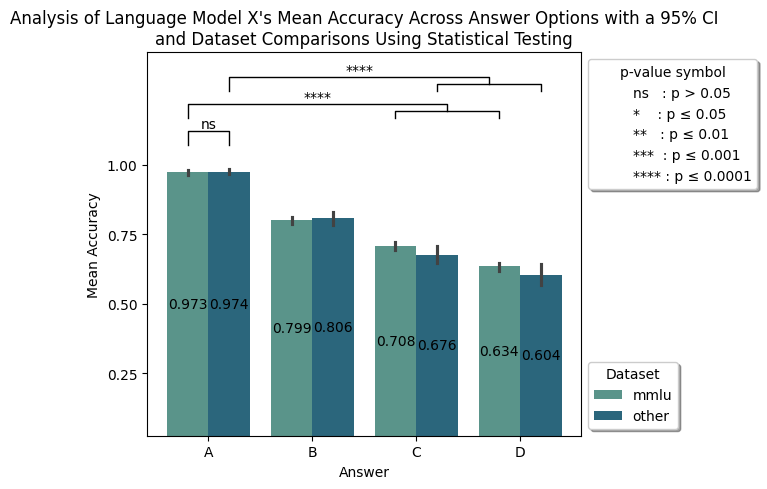

In [29]:
# A
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')
df_mmlu["dataset"] = "mmlu"
df_other["dataset"] = "other"

df_all_datasets = pd.concat([df_mmlu, df_other], axis=0)
plotting_df = df_all_datasets.query("model_name == 'X'")

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

barplot_with_ttest(
    plotting_df=plotting_df, 
    ax=ax, 
    test_pairs=[
        ([('A', 'mmlu')], [('A', 'other')]), 
        ([('A', 'mmlu')], [('C', 'mmlu'), ('D', 'mmlu')]),
        ([('A', 'other')], [('C', 'other'), ('D', 'other')]),
    ],              
)
ax.set_title("Analysis of Language Model X's Mean Accuracy Across Answer Options with a 95% CI\nand Dataset Comparisons Using Statistical Testing")
plt.tight_layout()
plt.show()

A. The mean accuracy of model X is written on each corresponding bar of the plot above.

B. When conditioned on the answers, the difference in accuracies when the correct answer is "A" between the two datasets is statistically non-significant (p = 0.83, CI = 95% and alpha = 0.05). Therefore, we do not reject the null hypothesis (both means are equal). This concludes that model X has no difference in performance between datasets when the answer is "A". The same analyses are conducted for models Y and Z, below.

C. Nevertheless, within each dataset, there is a statistical difference of the performance when the correct answer is "A" vs. "C or D" (p = 5.3e-139, p = 5.9e-96, for datasets "MMLU" and "Other" respectively).
These results indicate that for both datasets, model X has a bias towards particular answers, especially towards answer A, followed in order by B, C and D. We hypothesize that this could be due to i) model X preferring earlier answers, ii) to token distributions in the questions and answers, iii) a combination of these factors and others. Later analyses address these points. 

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

For model X:
T-Test :
	• (dataset == 'mmlu' and answer == 'B') **vs** (dataset == 'other' and answer == 'B')
	• p-value = 6.0e-01
T-Test :
	• (dataset == 'mmlu' and answer == 'C') **vs** (dataset == 'other' and answer == 'C')
	• p-value = 6.4e-02
T-Test :
	• (dataset == 'mmlu' and answer == 'D') **vs** (dataset == 'other' and answer == 'D')
	• p-value = 1.5e-01
T-Test :
	• (dataset == 'mmlu' and answer == 'A') **vs** (dataset == 'other' and answer == 'A')
	• p-value = 8.3e-01
--------------------------------------------------
For model Y:
T-Test :
	• (dataset == 'mmlu' and answer == 'B') **vs** (dataset == 'other' and answer == 'B')
	• p-value = 1.4e-01
T-Test :
	• (dataset == 'mmlu' and answer == 'C') **vs** (dataset == 'other' and answer == 'C')
	• p-value = 7.0e-02
T-Test :
	• (dataset == 'mmlu' and answer == 'D') **vs** (dataset == 'other' and answer == 'D')
	• p-value = 1.9e-01
T-Test :
	• (dataset == 'mmlu' and answer == 'A') **vs** (dataset == 'other' and answer == 'A')
	• p-val

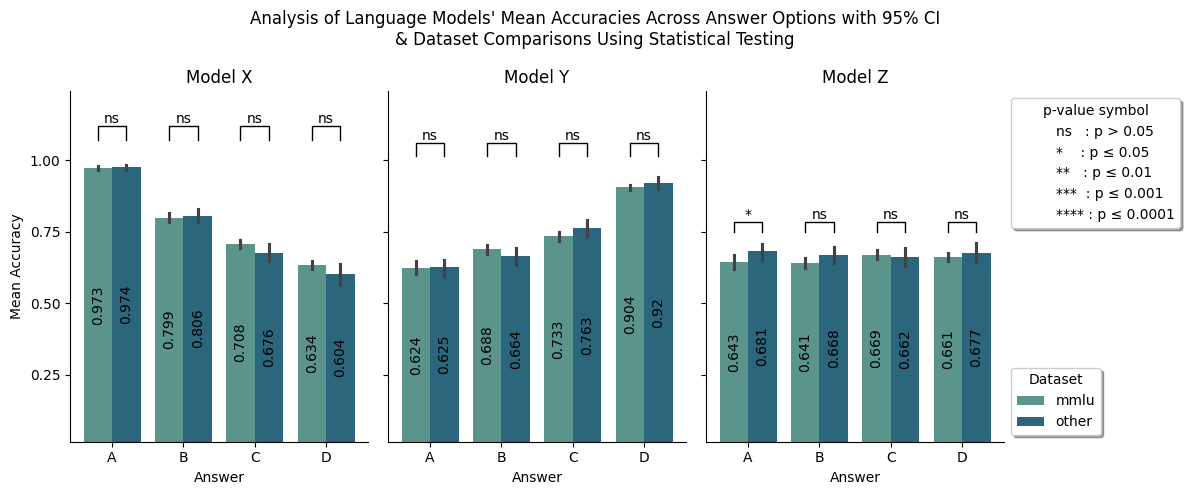

In [30]:
# A
fig, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(12, 5))

test_pairs = [
    ([(answer_option, "mmlu")], [(answer_option, "other")])
    for answer_option in df_all_datasets['answer'].unique()
]

for i, (ax, model_name) in enumerate(zip(axes, df_all_datasets['model_name'].unique())):
    print(f"For model {model_name}:")
    barplot_with_ttest(
        df_all_datasets.query("model_name == @model_name"), 
        ax=ax, 
        test_pairs=test_pairs, 
        stack_test_bars=False,
        legend=i==2,
        bar_label_fmt="{:.3}",
        bar_label_rotation=90,
    )
    ax.set_title(f"Model {model_name}")
    ax.spines[['right', 'top']].set_visible(False)
        
    print("-"*50)
    
fig.suptitle("Analysis of Language Models' Mean Accuracies Across Answer Options with 95% CI\n& Dataset Comparisons Using Statistical Testing")
plt.tight_layout()
plt.show()

B.

From the figure above, we can firstly observe a general trend of each model's accuracy in answering questions. Here, for both datasets, model X performs the best on questions with answer A, and has decreasing performance when answering questions with answers B, C and D. This suggests (as discussed above) a bias for model X answering A, and more generally a bias towards "earlier" answers.

The same is true for model Y, in the opposite direction. Indeed, it seems to have a bias towards "later" answers. Model Z on the other hand performs equally between questions, suggesting little bias for a particular answer.

Looking at differences in answers of single models between datasets, we observe that they all generally perform, as differences are statistically non-significant (except for model Z on questions with answers A). This is different to what we observed on a "surface level" in part 2.1.C, where the overall accuracy was seen to be different on the different datasets. This is most probably due to the non-uniform distribution of answers in the datasets.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

The idea of shuffling the position of the correct answers is to test whether each model's performance is influenced by the position of the answer rather than its content. In particular, we have previously shown that model X and Y might have biases towards earlier or later answers, respectively. This shuffle allows to correct for such biases, and test the robustness of each model. Indeed, we want to select a model by its ability to answer questions based on content, not position patterns.

Below we show the new distributions of answers after the shuffling proposed by Ms. Sakota.

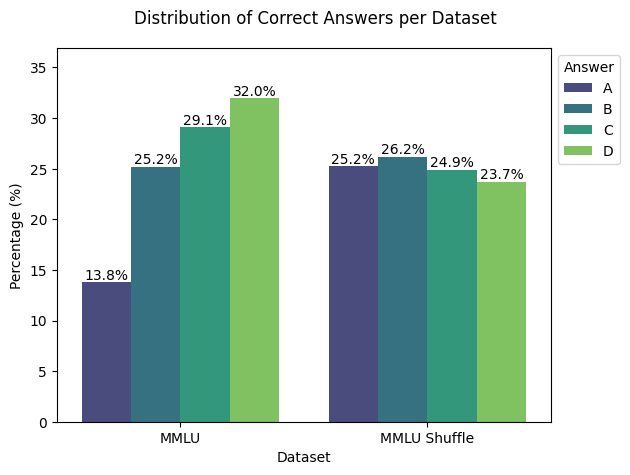

In [31]:
df_mmlu_shuffle = pd.read_csv('task_2_5/lm_scores_mmlu_shuffle.csv')
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_mmlu["dataset"] = "MMLU"
df_mmlu_shuffle["dataset"] = "MMLU Shuffle"

fig, ax = plt.subplots()

x, y = 'dataset', 'answer'
df = pd.concat([df_mmlu.drop_duplicates("question_id"), df_mmlu_shuffle.drop_duplicates("question_id")])
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
sns.barplot(
    data=df1,
    x="dataset",
    y="percent",
    hue="answer",
    palette="viridis",
    hue_order=["A", "B", "C", "D"],
    ax=ax
)
ax.set_xlabel("Dataset")
ax.set_ylabel("Percentage (%)")
ax.legend(title="Answer")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

for _, bar_container in enumerate(ax.containers):
    ax.bar_label(
        bar_container,
        fmt="{:.3}%",
        label_type="edge",
    )
ax.set_ylim(0, 1.1*ax.get_ylim()[-1])

fig.suptitle("Distribution of Correct Answers per Dataset")

plt.tight_layout()
plt.show()

For model X:
T-Test :
	• (dataset == 'mmlu' and answer == 'B') **vs** (dataset == 'mmlu_shuffle' and answer == 'B')
	• p-value = 5.8e-01
T-Test :
	• (dataset == 'mmlu' and answer == 'C') **vs** (dataset == 'mmlu_shuffle' and answer == 'C')
	• p-value = 7.7e-01
T-Test :
	• (dataset == 'mmlu' and answer == 'D') **vs** (dataset == 'mmlu_shuffle' and answer == 'D')
	• p-value = 3.8e-01
T-Test :
	• (dataset == 'mmlu' and answer == 'A') **vs** (dataset == 'mmlu_shuffle' and answer == 'A')
	• p-value = 4.3e-01
--------------------------------------------------
For model Y:
T-Test :
	• (dataset == 'mmlu' and answer == 'B') **vs** (dataset == 'mmlu_shuffle' and answer == 'B')
	• p-value = 3.7e-01
T-Test :
	• (dataset == 'mmlu' and answer == 'C') **vs** (dataset == 'mmlu_shuffle' and answer == 'C')
	• p-value = 4.8e-01
T-Test :
	• (dataset == 'mmlu' and answer == 'D') **vs** (dataset == 'mmlu_shuffle' and answer == 'D')
	• p-value = 2.9e-01
T-Test :
	• (dataset == 'mmlu' and answer == 'A') **vs*

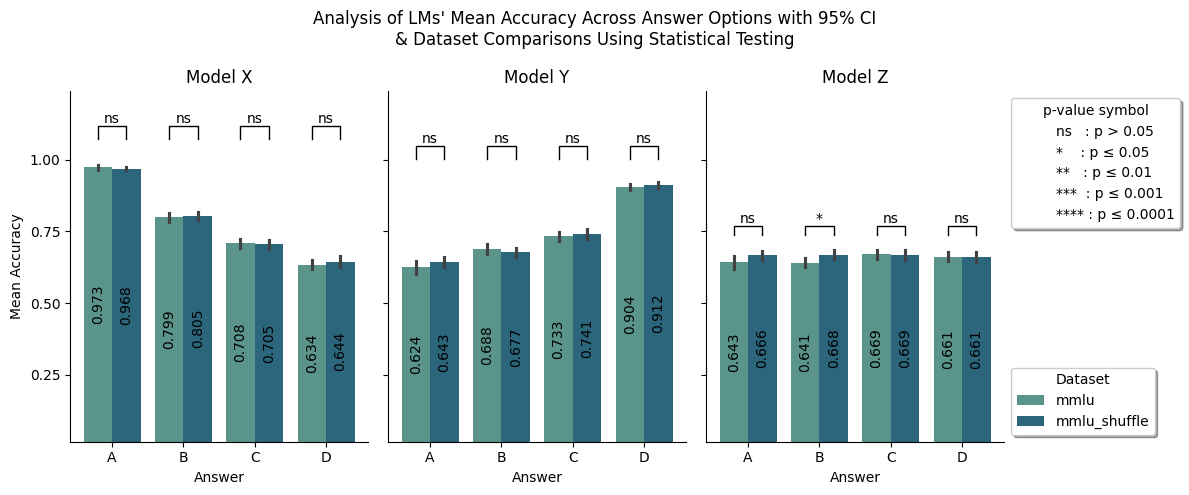

In [32]:
df_mmlu_shuffle = pd.read_csv('task_2_5/lm_scores_mmlu_shuffle.csv')
df_mmlu_shuffle['dataset'] = "mmlu_shuffle"
df_mmlu['dataset'] = "mmlu"
df_both_mmlu = pd.concat([df_mmlu, df_mmlu_shuffle], axis=0)


fig, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(12, 5))

test_pairs = [
    ([(answer_option, "mmlu")], [(answer_option, "mmlu_shuffle")])
    for answer_option in df_both_mmlu['answer'].unique()
]
    
for i, (ax, model_name) in enumerate(zip(axes, df_both_mmlu['model_name'].unique())):
    print(f"For model {model_name}:")
    barplot_with_ttest(
        df_both_mmlu.query("model_name == @model_name"), 
        ax=ax, 
        test_pairs=test_pairs, 
        stack_test_bars=False,
        legend=i==2,
        bar_label_fmt="{:.3}",
        bar_label_rotation=90,
    )
    ax.set_title(f"Model {model_name}")
    ax.spines[['right', 'top']].set_visible(False)
        
    print("-"*50)
    
fig.suptitle("Analysis of LMs' Mean Accuracy Across Answer Options with 95% CI\n& Dataset Comparisons Using Statistical Testing")
plt.tight_layout()

The above figure shows the resulting accuracies of each model, per question on the original and shuffled MMLU datasets. In particular, we observe that, statistically, every model generally performs similarly on both datasets. Although the true answer has been shuffled, model X and Y show the same accuracy pattern, being highly accurate for A and D respectively. This suggests that the models favor a specific answer option ('A' or 'D'), irrespectively of the context. Doing so, high accuracies are observed on these answers, at the expense of others. We come back to this observation in part 2.7.

To analyze this further, we also propose to use the test-retest metric as shown below.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

T-Test :
	• (model_name == 'X' and metric == 'correct_x') **vs** (model_name == 'X' and metric == 'correct_y')
	• p-value = 1.2e-12
T-Test :
	• (model_name == 'Y' and metric == 'correct_x') **vs** (model_name == 'Y' and metric == 'correct_y')
	• p-value = 1.7e-04
T-Test :
	• (model_name == 'Z' and metric == 'correct_x') **vs** (model_name == 'Z' and metric == 'correct_y')
	• p-value = 1.0e-01
T-Test :
	• (model_name == 'X' and metric == 'correct_x') **vs** (model_name == 'Y' and metric == 'correct_x')
	• p-value = 1.5e-03
T-Test :
	• (model_name == 'X' and metric == 'correct_y') **vs** (model_name == 'Y' and metric == 'correct_y')
	• p-value = 1.4e-14
T-Test :
	• (model_name == 'X' and metric == 'test-retest') **vs** (model_name == 'Y' and metric == 'test-retest')
	• p-value = 9.4e-03


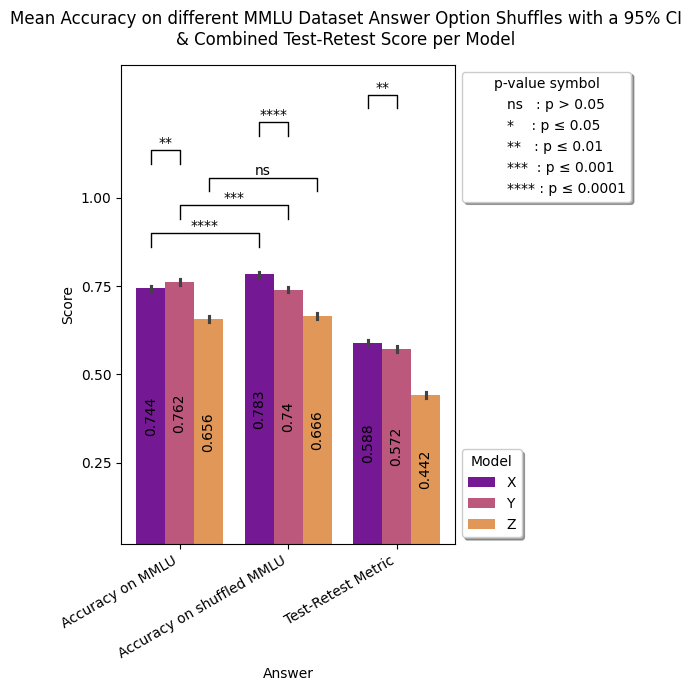

In [41]:
# Reload the dataframes
df_mmlu_shuffle = pd.read_csv('task_2_5/lm_scores_mmlu_shuffle.csv')
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')

fig, ax = plt.subplots(figsize=(6, 7))


df_mmlu_retest = df_mmlu.merge(df_mmlu_shuffle, on=["question_id", "model_name", "question", "subject"])

df_mmlu_retest["test-retest"] = df_mmlu_retest["correct_x"] * df_mmlu_retest["correct_y"] # Since M = 1
df_mmlu_retest = df_mmlu_retest.melt(id_vars=["question_id", "model_name", "question", "subject", "answer_x", "answer_y", "result_x", "result_y"], value_vars=["correct_x", "correct_y", "test-retest"], var_name="metric", value_name="score")

test_pairs=[
    ([('correct_x', 'X')], [('correct_y', 'X')]),
    ([('correct_x', 'Y')], [('correct_y', 'Y')]),
    ([('correct_x', 'Z')], [('correct_y', 'Z')]),
    ([('correct_x', 'X')], [('correct_x', 'Y')]),
    ([('correct_y', 'X')], [('correct_y', 'Y')]),
    ([('test-retest', 'X')], [('test-retest', 'Y')]),
]

barplot_with_ttest(
    plotting_df=df_mmlu_retest,
    ax=ax,
    test_pairs=test_pairs,
    x="metric",
    y="score",
    hue="model_name",
    order=None,
    palette="plasma",
    show_bar_values=True,
    legend_title="Model",
    bar_label_rotation=90,
)

ax.set_xticklabels(["Accuracy on MMLU", "Accuracy on shuffled MMLU", "Test-Retest Metric"], rotation=30, ha="right")
ax.set_ylabel("Score")

fig.suptitle("Mean Accuracy on different MMLU Dataset Answer Option Shuffles with a 95% CI\n& Combined Test-Retest Score per Model")
plt.tight_layout()
plt.show()

As mentioned previously, we expect a reliable model to show high accuracy on both the MMLU dataset and a version of the same dataset with shuffled answer options. Here, this reliability is assessed using the Test-Retest metric (right-most bars), which demonstrates that models X and Y perform better than model Z.

While the Test-Retest difference between models X and Y is small, it is statistically significant (p-value = 9.4e-03). More precisely, model X outperforms Y on the shuffled MMLU dataset (p-value = 1.4e-14), even though model Y shows better performance on the original dataset. This could be explained by the fact that the shuffled dataset has more correct answers "A" compared to the original MMLU, as model X is known to have a bias toward selecting that particular answer.

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

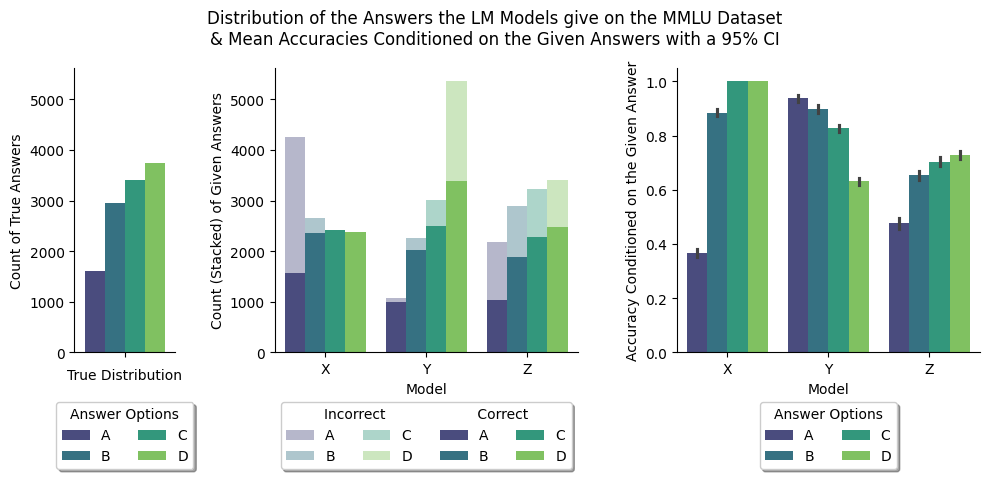

In [34]:
# A
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')

fig, (ax2, ax1, ax3) = plt.subplots(nrows=1, ncols=3, width_ratios=[1, 3, 3], figsize=(10, 5))
palette = "viridis"

df_answer_distr = df_mmlu.query("model_name == 'X'").copy()
df_answer_distr["correct"] = True
df_answer_distr["model_name"] = "Answer Distribution"
df_answer_distr["result"] = df_answer_distr["answer"]

sns.countplot(
    data=df_mmlu,
    x="model_name",
    hue="result",
    hue_order=["A", "B", "C", "D"],
    order=["X", "Y", "Z"],
    ax=ax1,
    alpha=0.4,
    palette = palette,
)
sns.countplot(
    data=df_mmlu.query("correct == True"),
    x="model_name",
    hue="result",
    hue_order=["A", "B", "C", "D"],
    order=["X", "Y", "Z"],
    ax=ax1,
    legend=True,
    palette = palette,
)
ax1.set_xlabel("Model")
ax1.set_ylabel("Count (Stacked) of Given Answers")

sns.countplot(
    data=df_answer_distr,
    x="model_name",
    hue="result",
    hue_order=["A", "B", "C", "D"],
    ax=ax2,
    legend=True,
    palette = palette,
)
ax2.set_ylim(ax1.get_ylim())
ax2.set_xticklabels([])
ax2.set_xlabel("True Distribution")
ax2.set_ylabel("Count of True Answers")

sns.barplot(
    data=df_mmlu,
    x="model_name",
    y="correct",
    hue="result",
    hue_order=["A", "B", "C", "D"],
    order=["X", "Y", "Z"],
    ax=ax3,
    legend=True,
    palette = palette,
)
ax3.set_xlabel("Model")
ax3.set_ylabel("Accuracy Conditioned on the Given Answer")


ax1.legend(title=f"Incorrect{' '*21}Correct")
ax2.legend(title="Answer Options")
ax3.legend(title="Answer Options")



# # Add the first legend
# first_legend = ax2.legend(title="Answers", loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
# # Add the second legend
# second_legend = ax.legend(title="p-value symbol",handles=[ax.plot([], [], ' ', label=f"{k:<4} : {v}")[0] for k, v in p_value_dict.items()], loc="upper left", bbox_to_anchor=(1, 1), shadow=True)
# # Manually add the first legend back to the plot
# ax.add_artist(first_legend)

for ax in (ax1, ax2, ax3):
    ax.spines[['right', 'top']].set_visible(False)


fig.suptitle("Distribution of the Answers the LM Models give on the MMLU Dataset\n& Mean Accuracies Conditioned on the Given Answers with a 95% CI")
sns.move_legend(ax1, loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)
sns.move_legend(ax2, loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
sns.move_legend(ax3, loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.tight_layout()
plt.show()

B. /Discuss:/

Looking at the plot showing the accuracy conditioned on the given answer, we see that model X performs poorly on answer "A". This contradicts the plot in part 2.5 analyzing the LM's mean accuracy across answer options, as the fact that X mostly answers "A" is not an indicator of its accuracy on this particular answer. Similarly, model Y is biased towards answer "D" but performs poorly on it. The distribution of answers of model Z seems not to be biased by any type of answer options.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [36]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken
def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [37]:
# A (Function)
def plot_tokenised(df:pd.DataFrame,
                   tokens:str,
                   cutoff:int=1000,
                   yscale:str="log",
                   order:bool = False,
                   ax = None
                   )->None:
    """
    Plots a barplot of token frequencies based on tokenized data.

    Parameters
    ----------
    df : pd.DataFrame
    tokens : str
    cutoff : int, optional
    yscale : str, optional
    order : bool, optional
    ax : matplotlib.axes.Axes, optional

    Returns
    -------
    None
        The function does not return anything. It generates a plot on the specified or current axis.

    """    
    all_tokens = pd.DataFrame(functools.reduce(operator.iconcat, df[tokens].to_list(), [])).rename({0:"token"},axis=1)
    token_count = all_tokens.value_counts().reset_index().rename(columns={0:"token"}).sort_values(by="count",ascending=False)
    
    if cutoff:
        token_count_cut = token_count[token_count["count"]>cutoff]
    else:
        token_count_cut = token_count
    if order:
        sns.barplot(token_count_cut,
                    x="token",
                    y="count",
                    order=token_count_cut["token"],
                    width=1,
                    hue="count",
                    palette="inferno_r",
                    ax = ax)
    else:
        sns.barplot(token_count_cut,
                    x="token",
                    y="count",
                    width=1,
                    hue="count",
                    palette="inferno_r",
                    ax = ax)
    ax.set_xticklabels([f'{text.get_text()}: {tiktoken.encoding_for_model("gpt-4o").decode([int(text.get_text())])}' for text in ax.get_xticklabels()], rotation = 90)
    ax.set_yscale(yscale)

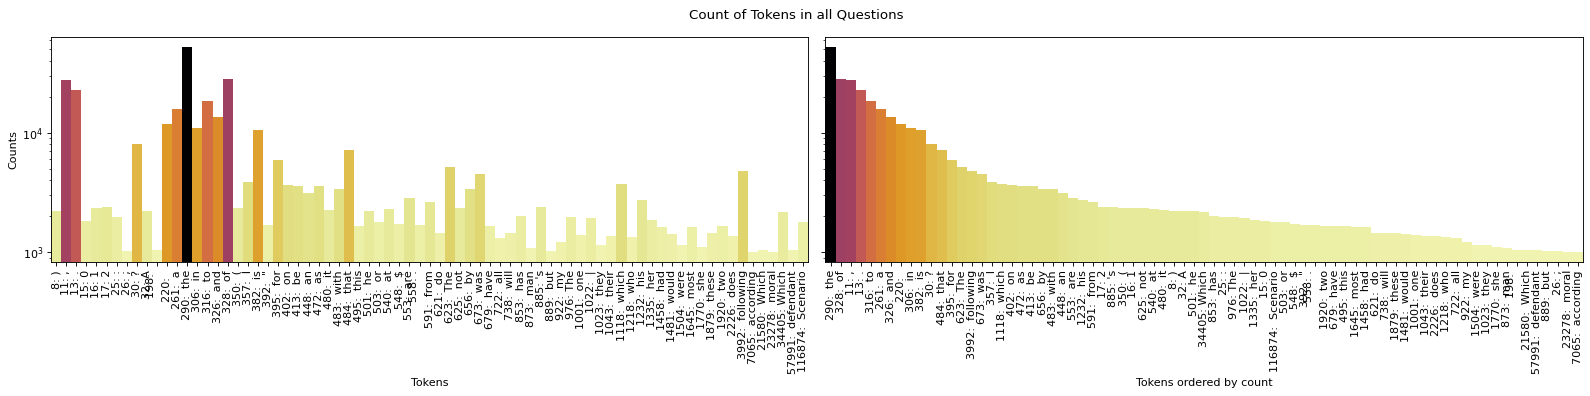

In [38]:
# A

fig, axes = plt.subplots(1,2,figsize=(20,5), dpi=80, sharey = True)
ax1, ax2 = axes
df_test["question_tokens"] = df_test['question'].apply(tokenize_text)
plot_tokenised(df_test,tokens="question_tokens",cutoff=1000, ax = ax1)
ax1.set_xlabel("Tokens")
ax1.set_ylabel("Counts")
ax1.get_legend().remove()



plot_tokenised(df_test,tokens="question_tokens",cutoff=1000, order = True, ax = ax2)
ax2.get_legend().remove()
ax2.set_xlabel("Tokens ordered by count")
ax2.set_ylabel("Counts")
fig.suptitle('Count of Tokens in all Questions')
plt.tight_layout()
plt.show()

As expected, the most frequent tokens include commonly used words like "the" and "of", along with punctuation such as ",", "." and "?", which are present in nearly every question. However, these frequent tokens are few in number, as the large majority of tokens are less frequent and rare, as represented by the distribution in the plots above.

As a note, the figure above shows tokens with a count of at least 1000 in all questions. The left panel is ordered by token number; the right panel is ordered by count.

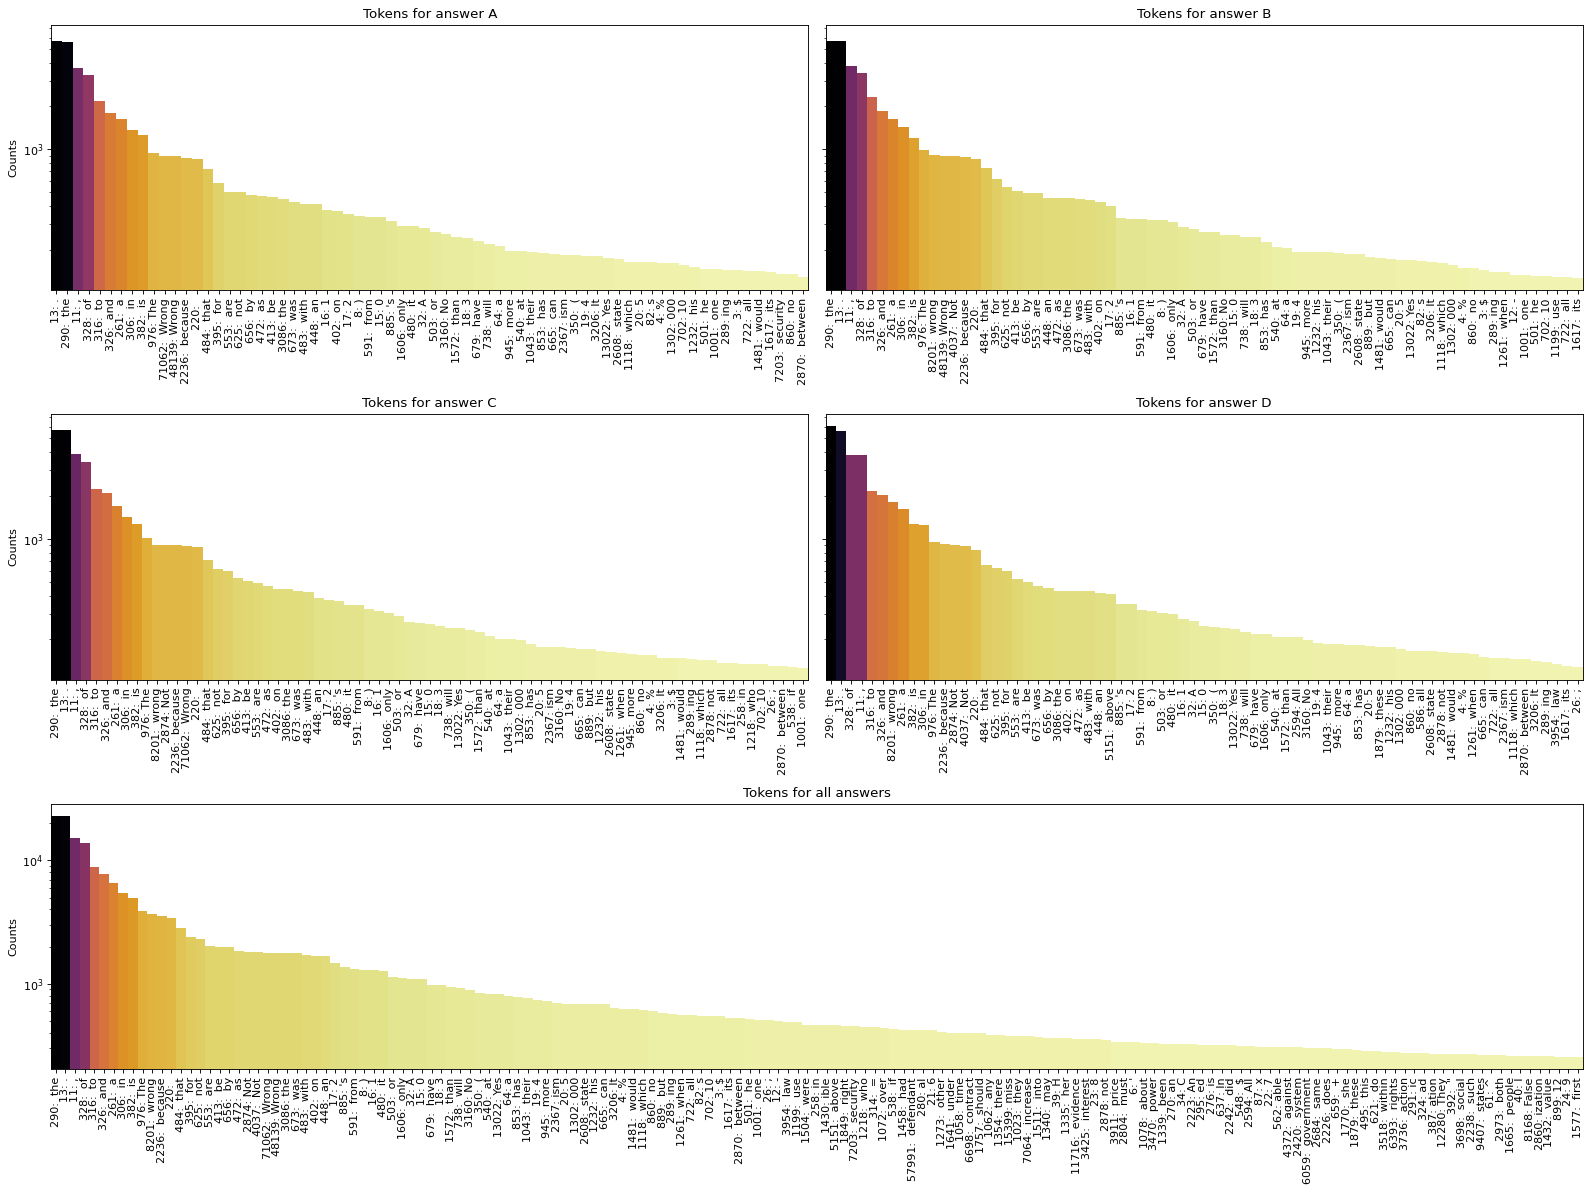

In [39]:
# B
fig, axes = plt.subplots(3, 2,figsize=(20,15), dpi=80, sharey=True)

for letter, ax in zip(["A","B","C","D"], axes.flatten()[:4]):
    df_test[f"tokens_{letter}"] = df_test[letter].apply(tokenize_text)

    plot_tokenised(df_test,tokens=f"tokens_{letter}",cutoff=125, ax = ax, order=True)
    ax.set_title(f"Tokens for answer {letter}")
    ax.set_ylabel("Counts")
    ax.get_legend().remove()
    ax.set_xlabel('')

ax5, ax6 = axes[2]
ax5.axis('off')
ax6.axis('off')
ax = fig.add_subplot(3,1,3)
df_test["answer_tokens"] = df_test["tokens_A"] + df_test["tokens_B"] + df_test["tokens_C"] + df_test["tokens_D"]
plot_tokenised(df_test,tokens="answer_tokens",cutoff=250, order = True, ax = ax)
ax.set_title(f"Tokens for all answers")
ax.set_ylabel("Counts")
ax.set_xlabel('')
ax.get_legend().remove()

fig.subplots_adjust()
plt.tight_layout()
plt.show()

Now looking at answers, we observe that the most frequent tokens are also seen in the questions. However, differences are observed. For example, tokenized elements such as "?", or "which" are common in question but not in answers. Also, we observe some other tokens, such as "wrong" and "because", that are frequently used in the answers but not questions. Overall, the distributions of counts are similar, with a few tokens occurring very frequently and most of them being more rare.

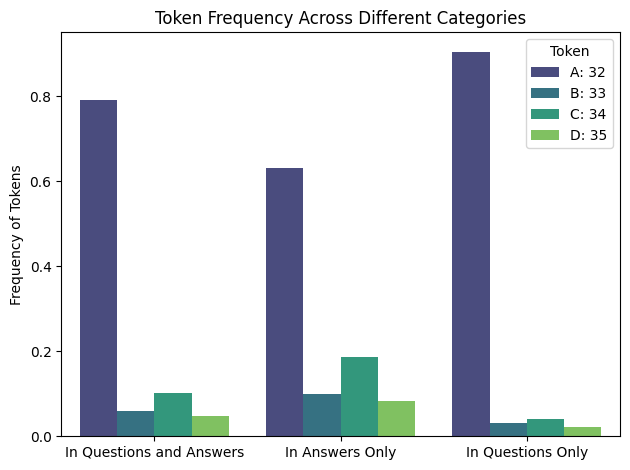

In [40]:
# C
df_letters = pd.DataFrame(["A","B","C","D"]).rename(columns={0:"letter"})
df_letters["letter_token"] = df_letters["letter"].apply(tokenize_text)
df_letters.set_index("letter", inplace=True)

df_test["all_tokens"] = df_test["question_tokens"] + df_test["answer_tokens"]

def token_frequency(df:pd.DataFrame,token_column:str)->pd.DataFrame:
    token_counts = pd.DataFrame([item for sublist in df[token_column] for item in sublist]).rename(columns={0:"token"}).value_counts()
    token_counts = token_counts[[df_letters.loc["A","letter_token"][0],
                                df_letters.loc["B","letter_token"][0],
                                df_letters.loc["C","letter_token"][0],
                                df_letters.loc["D","letter_token"][0]]].to_frame()
    token_counts["frequency"] = token_counts["count"]/token_counts["count"].sum()
    return token_counts

def prepare_plot_data():
    all_tokens_df = token_frequency(df_test, "all_tokens").assign(category="In Questions and Answers")
    answer_tokens_df = token_frequency(df_test, "answer_tokens").assign(category="In Answers Only")
    question_tokens_df = token_frequency(df_test, "question_tokens").assign(category="In Questions Only")
    
    # Concatenate the three DataFrames and reset the index
    combined_df = pd.concat([all_tokens_df, answer_tokens_df, question_tokens_df]).reset_index()
    combined_df.rename(columns={"index": "token"}, inplace=True)  # Rename the index column to 'token'
    
    return combined_df

plot_data = prepare_plot_data()
plt.figure()
sns.barplot(x="category", y="frequency", hue="token", data=plot_data, palette=sns.color_palette("viridis", 4))
plt.title("Token Frequency Across Different Categories")
plt.xlabel("")
plt.ylabel("Frequency of Tokens")
plt.xticks(ticks=[0, 1, 2], labels=["In Questions and Answers", "In Answers Only", "In Questions Only"])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(title="Token", handles = handles,labels = [f'{letter}: {tokenize_text(letter)[0]}' for letter in ["A", "B", "C", "D"]])
plt.tight_layout()
plt.show()


When looking at all tokens in both questions and answers, the token for the letter "A" is significantly more frequent (an approximate 5-fold increase). This is probably due to the letter "A" being a word as well as an answer.
When considering the tokens in the questions only, tokens for "A" are far more frequent than for the other letters "B", "C" and "D". This is also the case when considering the tokens in the answers only, but the difference between "A" and the other groups is less notable. Below, we show how this distribution changes when looking at questions with specific answers.

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


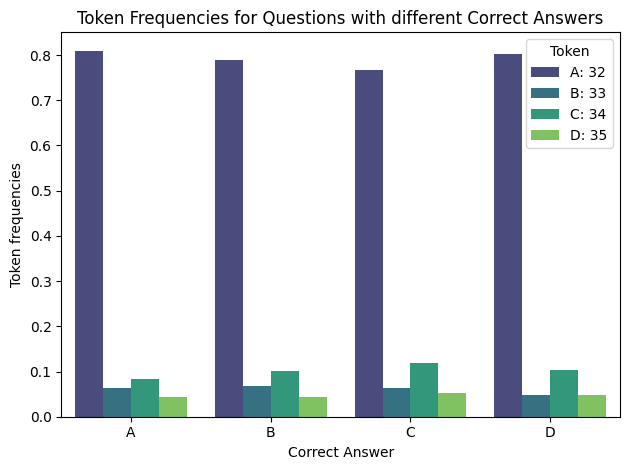

In [38]:
# A
all_data = []
for answer in ["A", "B", "C", "D"]:
    df_test_subset = df_test[df_test['answer'] == answer]
    answer_token_df = token_frequency(df_test_subset, "all_tokens")
    answer_token_df['answer'] = answer 
    all_data.append(answer_token_df)
combined_df = pd.concat(all_data)

sns.barplot(x="answer", y="frequency", hue="token", data=combined_df, palette=sns.color_palette("viridis", 4))
plt.title('Token Frequencies for Questions with different Correct Answers')
plt.xlabel('Correct Answer')
plt.ylabel('Token frequencies')
plt.xticks(ticks = [0,1,2,3], labels = ["A", "B", "C", "D"])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(title = 'Token',handles = handles,labels = [f'{letter}: {tokenize_text(letter)[0]}' for letter in ["A", "B", "C", "D"]])
plt.tight_layout()
plt.show()

B. Discussion :

When looking at all tokens for question-answer pairs separated depending on the correct answer, the token for the letter "A" is again by far the most frequent, even when the correct answer is "B", "C", or "D". This supports what was discussed in part 3.1.C.
Therefore, if a model relies on token frequencies in the given questions and answers, it might heavily be skewed towards answering "A". In particular, this might be the case for model X, which we have shown is biased towards this answer.


### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

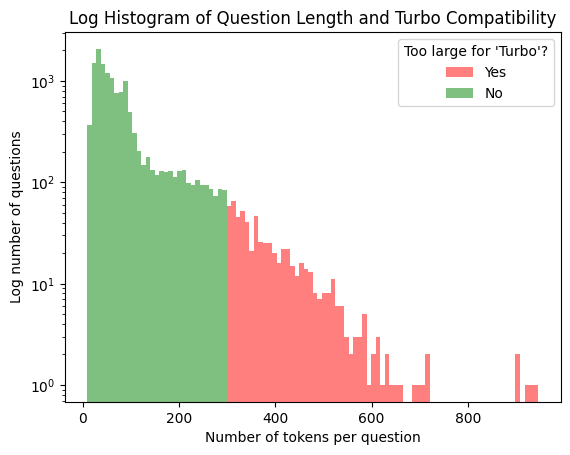

In [39]:
speed_df = pd.DataFrame()
speed_df['subject'] = df_test['subject']
speed_df['question'] = df_test['all_tokens']
speed_df['length'] = speed_df['question'].apply(len)
speed_df['threshold'] = (speed_df['length'] >= 300).astype(int)
speed_df = pd.merge(speed_df, pd.DataFrame(speed_df.groupby('subject')['threshold'].sum()).rename(columns={'threshold': 'count'}), on='subject', how='outer').rename(columns = {0: 'proportion'})
speed_df = pd.merge(speed_df, pd.DataFrame(speed_df.groupby('subject').apply(len, include_groups=False)).rename(columns={0: 'num'}), on='subject', how='outer').rename(columns = {0: 'proportion'})
speed_df['proportion'] = speed_df['count']/speed_df['num']

colors = ['green', 'red']
ax = sns.histplot(speed_df, x = 'length', hue = 'threshold', bins = 100, palette=colors, edgecolor=None)
plt.legend(['Yes', 'No'], title="Too large for 'Turbo'?", fancybox=True)
ax.set_yscale('log')
plt.xlabel("Number of tokens per question")
plt.ylabel("Log number of questions")
plt.title("Log Histogram of Question Length and Turbo Compatibility")
plt.show()

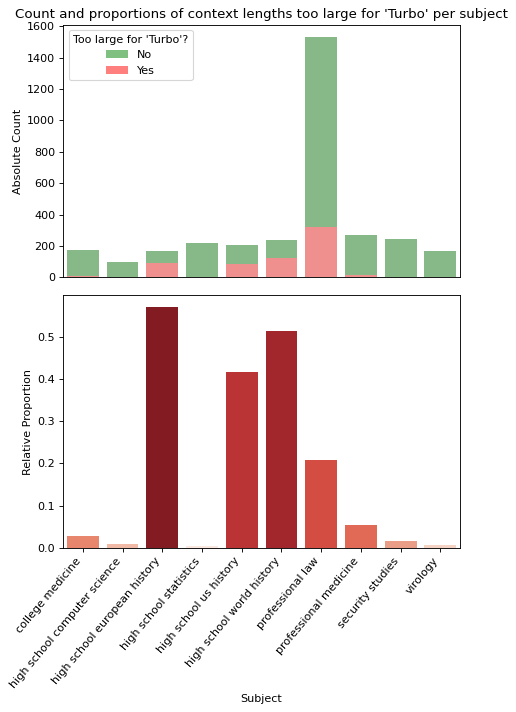

In [42]:
plt.figure(figsize=(6, 9), dpi=80)
color1 = '#ff7f7e'
color2 = '#7fc080'

plt.subplot(2, 1, 1)
ax1 = sns.barplot(speed_df[speed_df['proportion'] > 0], x = 'subject', y = 'num', color=color2)
ax2 = sns.barplot(speed_df[speed_df['proportion'] > 0], x = 'subject', y = 'count', color=color1)
plt.ylabel("Absolute Count")
plt.xticks(ticks=[])
plt.xlabel("")

# Create custom legend handles for the two colors
legend_handles = [
    Patch(facecolor=color2, label='No'),
    Patch(facecolor=color1, label='Yes')
]

plt.legend(handles=legend_handles, title="Too large for 'Turbo'?", fancybox=True)
plt.title("Count and proportions of context lengths too large for 'Turbo' per subject")

plt.subplot(2, 1, 2)
sns.barplot(data=speed_df[speed_df['proportion'] > 0], x='subject', y='proportion', hue= 'proportion',legend=False,palette=sns.color_palette("Reds", n_colors=10))
plt.xticks(rotation = 50, ha='right')
plt.xlabel("Subject")
plt.ylabel("Relative Proportion")

plt.tight_layout()
plt.show()

B. Discussion :

Overall only *4.6 %* of the questions in *15 %* of subjects will be affected by the shorter context length. However, we observe that the distribution of questions affected within subjects is highly non-uniform. In particular, 'high school European history' and 'high school world history' have over *50 %* questions affected. In contrast, other subjects such as: 'virology' and 'college statistic' have below 5 % of their question affected. If we consider that turbo's answer is likely false if the question exceeds the context length, the language model will be problematic in the most affected subjects discussed previously.

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/

# 1. Accuracy: 

## Accuracy of each model on given datasets
| Dataset / Metric        | X (%)  | Y (%)  | Z (%)  |
|------------------|--------|--------|--------|
| Part 1 MMLU / Accuracy    | **76.8** | 74.6   | 66.3   |
| Part 2 MMLU / Accuracy     | 74.4   | **76.2**   | 65.6   |
| "Other" / Accuracy          | **78.8**   | 72.1   | 67.2   |
| Shuffled MMLU / Accuracy   | **78.3**   | 74.0   | 66.6   |
| MMLU / Test Retest     | **58.8**   | 57.2   | 44.2   |



If we take into account only the various accuracy scores we obtained throughout our case study, we can see that Z clearly underperforms. On the other hand X is superior to Y over most datasets and metrics.

We have no test results for model Turbo.


# 2. Bias

X and Y are bias towards answers "A" and "D" respectively which leads to a poor performance when conditioned on those answers (see part 2.7). On the other hand model Z is not biased towards any particular answer options.

Model Turbo has shortcomings on long questions due to its context length, which are more common on specific subjects (see part 3.3). 


# 3. General Usability

Model X performs best on a multiple choice question setting, but might not generalize for another education related task such as helping with home works or explaining certain topics.

In task 1 we show that model Z was generally more verbose which may be a desirable trait in this regard. However, in this analysis long answers were disregarded and the accuracy of Model Z's long responses would still need to be tested.

Regarding the Turbo model if the questions tend to exceed its context length, it will not be a well suited model for the given task. More specifically in part 3.3, we observed that high school subject tend to have longer answers.


# 4. Speed

A faster model such as Turbo may be desirable for saving costs or easier deployment.

We do not know the inference times of model X, Y, and Z however we assume that they are not built with specific speed requirements in mind.


# Conclusion

From the previous points, and assuming that we are in a multiple question answering context, we prioritize overall accuracy over general usability. Therefore, we recommend the use of model X despite its bias. 

